# Inferential Statistics and the "New Statistics"

Correlation Analysis

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scipy
import scipy.stats.distributions as dist

In [2]:
#load data
censuscrime = pd.read_csv('C:/Users/Nadia/Downloads/censusCrimeClean.csv')
censuscrime.head()

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [4]:
#save 2 columns as variables 
medianIncome = censuscrime['medIncome']
print(medianIncome)
violentcrimes = censuscrime['ViolentCrimesPerPop']
print(violentcrimes)

0       0.37
1       0.31
2       0.30
3       0.58
4       0.50
        ... 
1989    0.42
1990    0.28
1991    0.31
1992    0.44
1993    0.40
Name: medIncome, Length: 1994, dtype: float64
0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64


In [8]:
#perform Pearson Correlation
[pearson, ppvalue] = scipy.pearsonr(medianIncome, violentcrimes)
print("Pearson Correlation coefficient is", pearson, "with a p-value of", ppvalue)

Pearson Correlation coefficient is -0.424220616726126 with a p-value of 6.334424808048533e-88


In [9]:
#Perform Spearman Correlation
[spearman, spvalue] = scipy.spearmanr(medianIncome, violentcrimes)
print("Spearman Correlation coefficient is", spearman, "with a p-value of", spvalue)

Spearman Correlation coefficient is -0.482169950997556 with a p-value of 1.2978853095169542e-116


Text(0, 0.5, 'Number of Violent Crimes per 100k Population')

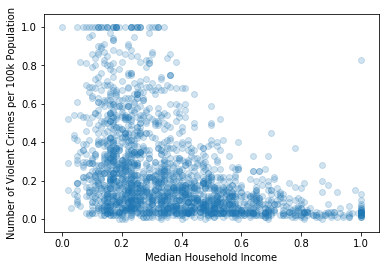

In [10]:
# Visualise using a Scatterplot
plt.scatter(medianIncome, violentcrimes, alpha = 0.2)
plt.xlabel("Median Household Income")
plt.ylabel("Number of Violent Crimes per 100k Population")

In [11]:
#Scatter plot shows negative correlation, agreeing with Pearsons coefficient
#Spearman's correlation, unlike Pearson's, doesn't assume that both the datasets are normally distributed, but still shows negative correlation

Pearson Correlation coefficient is 0.0993466802092155 with a p-value of 8.811040969646864e-06
Spearman Correlation coefficient is 0.3234638360172681 with a p-value of 8.622906648052271e-50


Text(0, 0.5, 'Number of Violent Crimes per 100k Population')

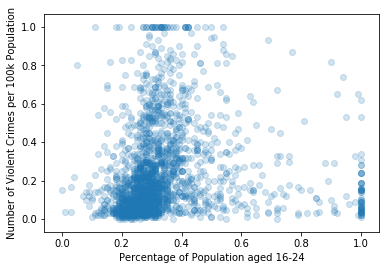

In [12]:
#comparing different columns
youngadults = censuscrime['agePct16t24']

#perform Pearson Correlation
[pearson, ppvalue] = scipy.pearsonr(youngadults, violentcrimes)
print("Pearson Correlation coefficient is", pearson, "with a p-value of", ppvalue)

#Perform Spearman Correlation
[spearman, spvalue] = scipy.spearmanr(youngadults, violentcrimes)
print("Spearman Correlation coefficient is", spearman, "with a p-value of", spvalue)

# Visualise using a Scatterplot
plt.scatter(youngadults, violentcrimes, alpha = 0.2)
plt.xlabel("Percentage of Population aged 16-24")
plt.ylabel("Number of Violent Crimes per 100k Population")

Significance Testing

In [13]:
#load data
heart = pd.read_csv('C:/Users/Nadia/Downloads/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
#Does the resting blood pressure (trestbps) differ between those with the disease and those without? 
#creating gender and hasHeartDisease columns
heart['gender'] = heart.sex.replace({1: "Male", 0: "Female"})
heart['hasHeartDisease'] = heart.target.replace({1: "False", 0: "True"})
print(heart.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  gender hasHeartDisease  
0   0     1       1    Male           False  
1   0     2       1    Male           False  
2   0     2       1  Female           False  
3   0     2       1    Male           False  
4   0     2       1  Female           False  


In [24]:
#calculating the mean and standard deviation
mean = heart['trestbps'].mean()
print("total mean resting blood pressure is", mean)
std = heart['trestbps'].std()
print("total standard deviation of resting blood pressue is", std)

diseased = heart[heart.hasHeartDisease == 'True']
nodisease = heart[heart.hasHeartDisease == 'False']

print("mean with disease", diseased.trestbps.mean())
print("mean without disease", nodisease.trestbps.mean())
print("standard deviation with disease", diseased.trestbps.std())
print("standard deviation without disease", nodisease.trestbps.std())

total mean resting blood pressure is 131.62376237623764
total standard deviation of resting blood pressue is 17.53814281351709
mean with disease 134.3985507246377
mean without disease 129.3030303030303
standard deviation with disease 18.72994396158135
standard deviation without disease 16.16961326687487


[Text(0.5, 1.0, "Doesn't have Heart Disease")]

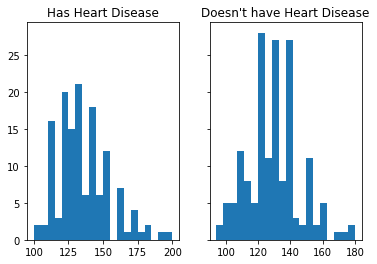

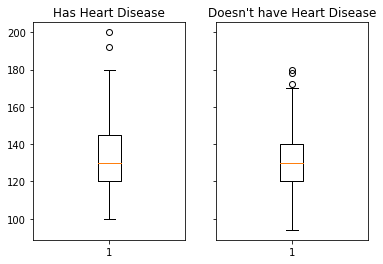

In [27]:
#create boxplots and histograms to compare means and distributions
fig, axes = plt.subplots(ncols=2,sharey=True)
axes[0].hist(diseased.trestbps, 20)
axes[0].set(title = "Has Heart Disease")
axes[1].hist(nodisease.trestbps, 20)
axes[1].set(title = "Doesn't have Heart Disease")

fig, axes = plt.subplots(ncols=2,sharey=True)
axes[0].boxplot(diseased.trestbps)
axes[0].set(title = "Has Heart Disease")
axes[1].boxplot(nodisease.trestbps)
axes[1].set(title = "Doesn't have Heart Disease")

In [31]:
#perform a t-test to compare the means
ttest = scipy.ttest_ind(diseased.trestbps, nodisease.trestbps, equal_var = False)
print(ttest)

Ttest_indResult(statistic=2.5083466038526687, pvalue=0.012710946533525032)


In [32]:
# p-value is 0.01 which is "highly significant". This indicates that the difference is large enough to suggest that it exists in the population

In [39]:
#Calculate Cohens d
#calculate sample sizes
n1 = len(diseased)
print(n1)
n2 = len(nodisease)
print(n2)

#calculate variance
s1 = np.var(diseased.trestbps, ddof=1)
print(s1)
s2 = np.var(nodisease.trestbps, ddof =1)
print(s2)

#calculate pooled standard deviation
s = np.sqrt(((n1 -1) *s1 + (n2 -1) *s2)/ (n1 + n2 - 2))
print(s)

#calculate means of samples
u1 = diseased.trestbps.mean()
print(u1)
u2 = nodisease.trestbps.mean()
print(u2)

#calcluate cohen's d
d = (u1 - u2)/s
print("Cohen's d is", d)

138
165
350.8108008039776
261.4563932002958
17.381772271328867
134.3985507246377
129.3030303030303
Cohen's d is 0.29315309981436166


In [40]:
#cohen's d measures the difference between the means. 
#0.293 means there is a small effect size

In [41]:
#Is the Proportion of men and women who get heart disease the same?

In [42]:
#count number with the disease for each gender 
diseasedcount= diseased.groupby("gender").count().hasHeartDisease

#count number of gender type
totalcount = heart.groupby("gender").count()['hasHeartDisease']

#combine into data frame and specify columns
p = pd.concat([diseasedcount, totalcount], axis=1)
p.columns = ["diseasedcount", "totalcount"]

#create new column and calculate the proportion
p['propHeartDisease'] = p["diseasedcount"]/p["totalcount"]
print(p.head())

        diseasedcount  totalcount  propHeartDisease
gender                                             
Female             24          96          0.250000
Male              114         207          0.550725


In [44]:
#calculate proportion of people with heart disease
p_fe = p.propHeartDisease.Female
p_male = p.propHeartDisease.Male

p = len(heart[heart['hasHeartDisease']=='True'])/len(heart)
print(p)

0.45544554455445546


In [48]:
#calculate standard erorr
n1 = totalcount.Female
n2 = totalcount.Male
se = np.sqrt(p*(1-p)*(1/n1 + 1/n2))
print("Standard Error is", se)

Standard Error is 0.06149494420532701


In [51]:
#calculate the best estimate
be = p_fe - p_male  

In [52]:
#Calculate the hypothesized estimate
#Our null hypothesis is p1 - p2 = 0
he = 0

In [56]:
#Calculate the test statistic
teststat = (be - he)/se
print("Test Stat is", teststat)

Test Stat is -4.890233523540771


In [60]:
#calculate p-value
pvalue = 2*dist.norm.cdf(-np.abs(teststat))
print("P-Value is", pvalue)

P-Value is 1.0071642033238867e-06


In [61]:
#can reject null hypothesis that there is no difference